Ejercicio 1:
Supongamos que estamos realizando un experimento para determinar si un nuevo diseño de anuncio (test group "ad") tiene un impacto significativo en la tasa de conversión en comparación con el diseño de anuncio anterior (test group "psa").

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("marketing_AB.csv", index_col=0)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
df['test group'].value_counts()

ad     564577
psa     23524
Name: test group, dtype: int64

In [10]:
df['test group'].isnull().sum()

0

In [11]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


<AxesSubplot:xlabel='test group', ylabel='count'>

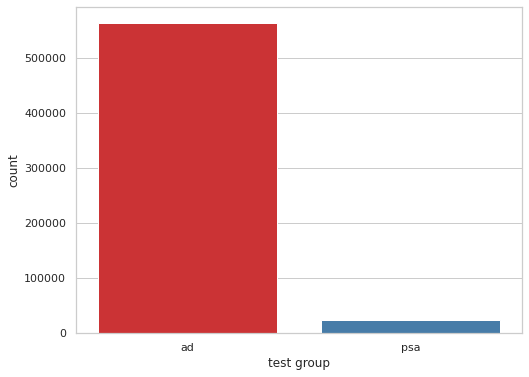

In [15]:
plt.figure(figsize=(8, 6))

# usamos el método `countplot()` para contar cuántos datos por categoría
sns.countplot(x='test group',
data=df,
palette='Set1')

In [40]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [56]:
## Calcular la tasa de conversión para ad
ad = df[df['test group'] == 'ad']
convertidos_ad = ad[ad['converted'] == True]
total_ad = ad.shape[0]
total_convertidos_ad = convertidos_ad.shape[0]

 #el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.
tasa_conversion_ad = total_convertidos_ad / total_ad
print(round(tasa_conversion_ad, 4))


0.0255


In [55]:
## Calcular la tasa de conversión para psa
psa = df[df['test group'] == 'psa']
convertidos_psa = psa[psa['converted'] == True]
total_psa = psa.shape[0]
total_convertidos_psa = convertidos_psa.shape[0]

 #el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.
tasa_conversion_psa = total_convertidos_psa / total_psa
round(tasa_conversion_psa, 4)

0.0179

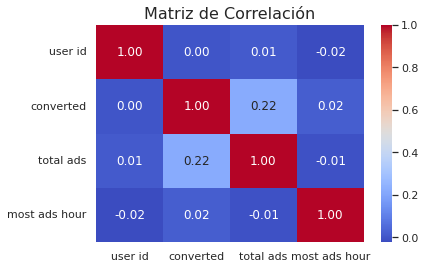

In [57]:
#  Prueba Hipótesis
# Visualizar la matriz de correlación
correlacion_matrix = df.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()




In [ ]:
# Realizar la prueba de chi-cuadrado para evaluar la independencia de dos variables categóricas
contingency_table = pd.crosstab(df['campaign_name'], df['date'])
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")



In [ ]:
# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
control_group = df[df['campaign_name'] == 'Control Campaign']
test_group = df[df['campaign_name'] == 'Test Campaign']
t_stat, p_ttest = ttest_ind(control_group['CTR'], test_group['CTR'])
print(f"Prueba t para CTR entre Control y Test - p-valor: {p_ttest}")

In [59]:
t_stat, p_ttest = ttest_ind(tasa_conversion_ad, tasa_conversion_psa)
print(f"Prueba t para tasa de conversión entre Control y Test - p-valor: {p_ttest}")

Prueba t para tasa de conversión entre Control y Test - p-valor: nan
